Лабораторна робота №4 Студентки групи БС-83 Харченко Софії

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
table = pd.DataFrame({'Group_1':[10,15,14,12,11],
                      'Group_2':[16,13,15,14,10]},
                    index = ['ind_1','ind_2','ind_3','ind_4','ind_5'])
table

,Group_1,Group_2
ind_1,10,16
ind_2,15,13
ind_3,14,15
ind_4,12,14
ind_5,11,10


2. Побудувати графік, що відображає розподіл ознак в групах.

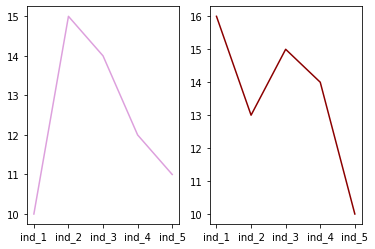

In [19]:
plt.subplot(1, 2, 1) 
plt.plot(table.index, table['Group_1'], 'plum')

plt.subplot(1, 2, 2) 
plt.plot(table.index, table['Group_2'],'darkred')

3.Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.
Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [20]:
def pirson (table, significant_level, num_level):
    z = 0
    prob = 0
    x_emp = 0
    gr_n=[]   #(n-n')^2
    gr_n_div=[] #(n-n')^2 / n'
    
    l_st=len(table.iloc[:,0])
    for i in range(l_st):
        z = table.iloc[i,0] - table.iloc[i,1]
        z_sq = z**2 #(n-n')^2
        gr_n.append(z_sq)
        z_sq_div = z_sq/table.iloc[i,1] #(n-n')^2 / n'
        gr_n_div.append(z_sq_div)
        x_emp += z_sq_div 
   
    table["(n-n')^2"] = gr_n  
    table["(n-n')^2 / n"] = gr_n_div
    print(table)
    print('')
    print("Сума отриманих значень: χ^2 =",x_emp)
    r= l_st - 1 
    print("Ступінь свободи: r =",r)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('Таблиця критичних значень для критерію Пірсона.xlsx')
    sheet = rb.sheet_by_index(0)
    x_kr = sheet.row_values(r+1)[num_level]
    print("χ^2 критичне = ", x_kr)
    
    text = 0   
    if((x_emp**2) > (x_kr**2)):
        text = "Розбіжність значима бо χ^2 > χ^2(критичне)"%table
    else:
        text = "Розбіжність незначима бо χ^2 < χ^2(критичне)"%table
    print(text)
    print("")

In [23]:
pirson(table, 0.01, 1) 

       Group_1  Group_2  (n-n')^2  (n-n')^2 / n
ind_1       10       16        36      2.250000
ind_2       15       13         4      0.307692
ind_3       14       15         1      0.066667
ind_4       12       14         4      0.285714
ind_5       11       10         1      0.100000

Сума отриманих значень: χ^2 = 3.01007326007326
Ступінь свободи: r = 4
χ^2 критичне =  13.3
Розбіжність незначима бо χ^2 < χ^2(критичне)



In [25]:
pirson(table, 0.05, 2)

       Group_1  Group_2  (n-n')^2  (n-n')^2 / n
ind_1       10       16        36      2.250000
ind_2       15       13         4      0.307692
ind_3       14       15         1      0.066667
ind_4       12       14         4      0.285714
ind_5       11       10         1      0.100000

Сума отриманих значень: χ^2 = 3.01007326007326
Ступінь свободи: r = 4
χ^2 критичне =  9.5
Розбіжність незначима бо χ^2 < χ^2(критичне)



4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

Ознака  | Група 1 | Група 2  | 
------------- | ------------- |--------- |
Градація ознаки 1  | $n_{11}  $   | $n_{21}$   |
Градація ознаки 2  | $n_{12}$   | $n_{22}$   |
Градація ознаки 3  | $n_{13}$   | $n_{23}$   |

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.
Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [26]:
sum_1 = 0
sum_2 = 0

len_st=len(table.iloc[:,0])

for i in range(len_st):
    sum_1 += table.iloc[i,0]
    
for i in range(len_st):
    sum_2 += table.iloc[i,1]

gr_1_per = []
gr_2_per = []

tmp1 = 0
for i in range(len_st):
    tmp1 = (table.iloc[i,0] * 100) / sum_1
    tmp1 = float('{:.5f}'.format(tmp1)) #Скорочуємо кількість знаків після коми до 5
    gr_1_per.append(tmp1)

tmp2 = 0
for i in range(len_st):
    tmp2 = (table.iloc[i,1] * 100) / sum_2
    tmp2 = float('{:.5f}'.format(tmp2)) #Скорочуємо кількість знаків після коми до 5
    gr_2_per.append(tmp2)

#Формуємо таблицю
new_table = pd.DataFrame({'Gr_1':[23,25,24,26,25],
                   'Gr_2':[21,24,25,25,28]},
                    index = ['Grad_1','Grad_2','Grad_3','Grad_4','Grad_5'])

new_table["Gr_1 %"] = gr_1_per         #додаємо два нових стовбця
new_table["Gr_2 %"] = gr_2_per
print(new_table)

        Gr_1  Gr_2    Gr_1 %    Gr_2 %
Grad_1    23    21  16.12903  23.52941
Grad_2    25    24  24.19355  19.11765
Grad_3    24    25  22.58065  22.05882
Grad_4    26    25  19.35484  20.58824
Grad_5    25    28  17.74194  14.70588


In [30]:
result_table = pd.DataFrame( {"Рівень значимості":[pirson(table, 0.01, 1), pirson (table, 0.05, 2)]},
                        index = ["0.01","0.05"])
result_table.columns.name = "significant level"
result_table

       Group_1  Group_2  (n-n')^2  (n-n')^2 / n
ind_1       10       16        36      2.250000
ind_2       15       13         4      0.307692
ind_3       14       15         1      0.066667
ind_4       12       14         4      0.285714
ind_5       11       10         1      0.100000

Сума отриманих значень: χ^2 = 3.01007326007326
Ступінь свободи: r = 4
χ^2 критичне =  13.3
Розбіжність незначима бо χ^2 < χ^2(критичне)

       Group_1  Group_2  (n-n')^2  (n-n')^2 / n
ind_1       10       16        36      2.250000
ind_2       15       13         4      0.307692
ind_3       14       15         1      0.066667
ind_4       12       14         4      0.285714
ind_5       11       10         1      0.100000

Сума отриманих значень: χ^2 = 3.01007326007326
Ступінь свободи: r = 4
χ^2 критичне =  9.5
Розбіжність незначима бо χ^2 < χ^2(критичне)



significant level,Рівень значимості
0.01,None
0.05,None



Висновок:

Під час порівняння  груп за розподіленням ознаки за допомогою критерію Пірсона, було отримано результат,і можна зробити висновок, що статична розбіжність між групами на рівнях значимості 0.05 і 0.01 є статистично незначимою, так як в двох випадках χ^2 < χ^2(критичне)